# Visualization of Stock Trading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import datetime
import pandas_datareader.data as web


import matplotlib.pyplot as plt

import logging
import coloredlogs

from train import *
from evaluate import show_eval_result

# Altair:
# in case of error on notebook: Istll vega_datasets
#conda install -c conda-forge altair vega_datasets notebook vega
#see also https://altair-viz.github.io/getting_started/installation.html
alt.renderers.enable('notebook')

Using TensorFlow backend.


[[0.5        0.5        0.5        0.5        0.00247262 0.99330715]]
(1, 6)


RendererRegistry.enable('notebook')

## Set relevant parameters
 - Window-Size: cutout of stock data that agent gets as state for his decision making
 - ep_count: # of epochs
 - Model Name (hint: model saved automatically after 10 epochs)
 - Pretrained: Load Pretrained Model or create new one

In [37]:
window_size = 15
batch_size = 20 #16
ep_count = 20 # 3-5 for debugging, otherwise 20-100
model_name = 'model_w15v2'
pretrained = False
debug = False

## Load Datasets into pandas DataFrame

I1003 18:16:27.698170  8916 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-10-03 18:16:27 PC-Stefan urllib3.connectionpool[18304] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I1003 18:16:28.083768  8916 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1325386800&period2=1514861999&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-03 18:16:28 PC-Stefan urllib3.connectionpool[18304] DEBUG https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1325386800&period2=1514861999&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I1003 18:16:28.447201  8916 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1325386800&period2=1514861999&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-03 18:16:28 PC-Stefan urllib3.connectionpool[18304] DEBUG https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1325386800&perio

<Figure size 432x288 with 0 Axes>

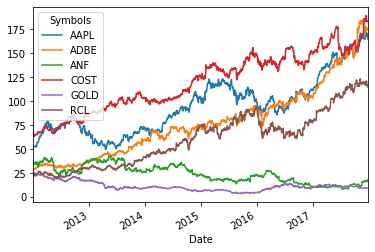

In [33]:
# Loading Train Data
# Setting Start and Enddate for Validation

start_train= datetime.datetime(2012, 1, 1)
end_train = datetime.datetime(2018, 1, 1)
start_val = end_train
end_val = datetime.datetime.now()


# Load Test Data

# Load several stocks
df_train = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF', 'GOLD'],'yahoo',
                               start=start_train, end=end_train)['Adj Close']

df2_train = web.DataReader('GOLD','yahoo',
                               start=start_train, #start_train
                               end=end_train) #end_train


df_val = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF', 'GOLD'],'yahoo',
                               start=start_val, #start_train
                               end=end_val)['Adj Close'] #end_val
df2_val = web.DataReader('GOLD','yahoo',
                               start=start_val, #start_val
                               end=end_val)  #end_val


# Convert df2_test to list
df2_train_list = list(df2_train['Adj Close'])
df2_val_list = list(df2_val['Adj Close'])

plt.figure();
df_train.plot();

## Training of Model
 - List of stocks (loaded above) is shuffled in every epoch

I1003 19:19:31.361773  8916 train.py:156] switching to TensorFlow for CPU
2019-10-03 19:19:31 PC-Stefan root[18304] DEBUG switching to TensorFlow for CPU
Episode 1/15: 100%|██████████| 1508/1508 [00:25<00:00, 58.00it/s]
I1003 19:19:57.607834  8916 train.py:147] Episode 1/15 - Train Position: -$8.20  Val Position: -$7.06  Train Loss: 0.0061  (~25.9927 secs)
2019-10-03 19:19:57 PC-Stefan root[18304] INFO Episode 1/15 - Train Position: -$8.20  Val Position: -$7.06  Train Loss: 0.0061  (~25.9927 secs)
Episode 1/15: 100%|██████████| 1508/1508 [00:25<00:00, 59.03it/s]
I1003 19:20:23.322252  8916 train.py:147] Episode 1/15 - Train Position: -$4.01  Val Position: +$10.24  Train Loss: 0.0033  (~25.5368 secs)
2019-10-03 19:20:23 PC-Stefan root[18304] INFO Episode 1/15 - Train Position: -$4.01  Val Position: +$10.24  Train Loss: 0.0033  (~25.5368 secs)
Episode 1/15: 100%|██████████| 1508/1508 [00:26<00:00, 57.88it/s]
I1003 19:20:49.592902  8916 train.py:147] Episode 1/15 - Train Position: +$46.96

Episode 4/15: 100%|██████████| 1508/1508 [00:23<00:00, 63.28it/s]
I1003 19:29:22.265060  8916 train.py:147] Episode 4/15 - Train Position: +$1.82  Val Position: +$6.08  Train Loss: 0.0163  (~23.8371 secs)
2019-10-03 19:29:22 PC-Stefan root[18304] INFO Episode 4/15 - Train Position: +$1.82  Val Position: +$6.08  Train Loss: 0.0163  (~23.8371 secs)
Episode 5/15: 100%|██████████| 1508/1508 [00:23<00:00, 62.93it/s]
I1003 19:29:46.412389  8916 train.py:147] Episode 5/15 - Train Position: +$66.91  Val Position: -$24.46  Train Loss: 0.0182  (~23.9601 secs)
2019-10-03 19:29:46 PC-Stefan root[18304] INFO Episode 5/15 - Train Position: +$66.91  Val Position: -$24.46  Train Loss: 0.0182  (~23.9601 secs)
Episode 5/15: 100%|██████████| 1508/1508 [00:23<00:00, 63.20it/s]
I1003 19:30:10.434094  8916 train.py:147] Episode 5/15 - Train Position: +$179.14  Val Position: +$44.58  Train Loss: 0.0513  (~23.8576 secs)
2019-10-03 19:30:10 PC-Stefan root[18304] INFO Episode 5/15 - Train Position: +$179.14  Va

2019-10-03 19:38:28 PC-Stefan root[18304] INFO Episode 8/15 - Train Position: +$50.19  Val Position: +$200.91  Train Loss: 0.1428  (~23.9950 secs)
Episode 8/15: 100%|██████████| 1508/1508 [00:24<00:00, 62.56it/s]
I1003 19:38:52.394253  8916 train.py:147] Episode 8/15 - Train Position: +$164.73  Val Position: +$32.94  Train Loss: 0.1444  (~24.1036 secs)
2019-10-03 19:38:52 PC-Stefan root[18304] INFO Episode 8/15 - Train Position: +$164.73  Val Position: +$32.94  Train Loss: 0.1444  (~24.1036 secs)
Episode 9/15: 100%|██████████| 1508/1508 [00:23<00:00, 62.98it/s]
I1003 19:39:16.514674  8916 train.py:147] Episode 9/15 - Train Position: +$73.79  Val Position: +$332.43  Train Loss: 0.0554  (~23.9374 secs)
2019-10-03 19:39:16 PC-Stefan root[18304] INFO Episode 9/15 - Train Position: +$73.79  Val Position: +$332.43  Train Loss: 0.0554  (~23.9374 secs)
Episode 9/15: 100%|██████████| 1508/1508 [00:24<00:00, 62.04it/s]
I1003 19:39:40.998832  8916 train.py:147] Episode 9/15 - Train Position: +$23

2019-10-03 19:47:32 PC-Stefan root[18304] INFO Episode 12/15 - Train Position: +$82.69  Val Position: +$72.72  Train Loss: 0.0809  (~23.2081 secs)
Episode 12/15: 100%|██████████| 1508/1508 [00:23<00:00, 65.17it/s]
I1003 19:47:55.561226  8916 train.py:147] Episode 12/15 - Train Position: -$36.84  Val Position: +$8.89  Train Loss: 0.0523  (~23.1317 secs)
2019-10-03 19:47:55 PC-Stefan root[18304] INFO Episode 12/15 - Train Position: -$36.84  Val Position: +$8.89  Train Loss: 0.0523  (~23.1317 secs)
Episode 12/15: 100%|██████████| 1508/1508 [00:23<00:00, 64.03it/s]
I1003 19:48:19.277256  8916 train.py:147] Episode 12/15 - Train Position: -$3.05  Val Position: +$3.53  Train Loss: 0.0039  (~23.5527 secs)
2019-10-03 19:48:19 PC-Stefan root[18304] INFO Episode 12/15 - Train Position: -$3.05  Val Position: +$3.53  Train Loss: 0.0039  (~23.5527 secs)
Episode 13/15: 100%|██████████| 1508/1508 [00:23<00:00, 63.97it/s]
I1003 19:48:43.027547  8916 train.py:147] Episode 13/15 - Train Position: +$63.3

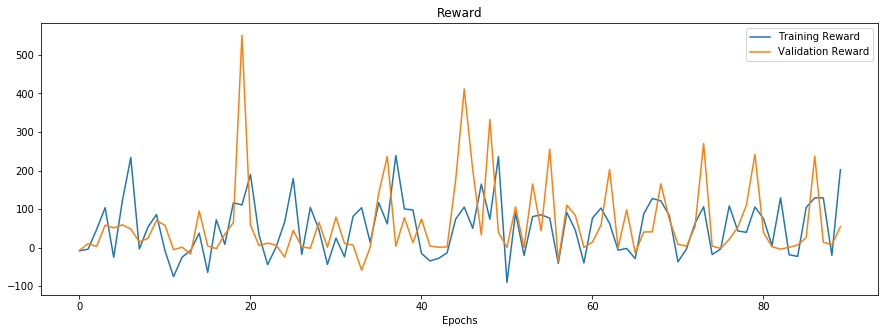

In [40]:
#Training
coloredlogs.install(level='DEBUG')
switch_k_backend_device() #switches to CPU (acc. to author faster than GPU)


if df2_train is not None:
    agent = Agent(window_size*2, pretrained=False, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=False, model_name=model_name)



reslist_t =[] # Train Reward for plotting
reslist_v = [] # Val Reward for plotting


for i in range(1, ep_count + 1): 
    np.random.shuffle(cols1)
    #shuffle columns of training data
    cols = df_train.columns.values
    np.random.shuffle(cols)
    df_train_s = df_train[cols]

    #print(cols)

    for column in df_train:
        #create list
        df_train_list = list(df_train[column])
        df_val_list = list(df_val[column])

        #dft = df_test.rename(columns={column: 'actual'})
        initial_offset = df_train_list[1] - df_train_list[0]
                
        train_result = train_model(agent, i, df_train_list, df2_train_list, ep_count=ep_count,
                                batch_size=batch_size, window_size=window_size)
        val_result, _ = evaluate_model(agent, df_val_list, df2_val_list, window_size, debug)
        show_train_result(train_result, val_result, initial_offset)
      
        reslist_t.append(train_result[2]) # append reward of training
        reslist_v.append(val_result)
        
# Plotting Training History  
plt.figure(figsize = (15,5))
plt.plot(reslist_t, label = "Training Reward");
plt.plot(reslist_v, label = "Validation Reward");
plt.title("Reward")
plt.xlabel("Epochs")
plt.legend()
plt.show()



## Visualization of actions taken by Trading Bot

In [41]:
def visualize(df, history):
    # add history to dataframe
    position = [history[0][0]] + [x[0] for x in history]
    actions = ['HOLD'] + [x[1] for x in history]
    df['position'] = position
    df['action'] = actions
    
    #alt.Chart(df.reset_index()).mark_line().encode(x='index')
    
    # specify y-axis scale for stock prices
    scale = alt.Scale(domain=(min(min(df['actual']), min(df['position'])) - 50, max(max(df['actual']), max(df['position'])) + 50), clamp=True)
    
    # plot a line chart for stock positions
    actual = alt.Chart(df.reset_index()).mark_line(
        color='green',
        opacity=0.5
    ).encode(
        x='Date:T', #'date:T'
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale)
    ).interactive(
        bind_y=False
    )
    
    # plot the BUY and SELL actions as points
    points = alt.Chart(df.reset_index()).transform_filter(
        alt.datum.action != 'HOLD'
    ).mark_point(
        filled=True
    ).encode(
        x=alt.X('Date:T', axis=alt.Axis(title='Date')),
        y=alt.Y('position', axis=alt.Axis(format='$.2f', title='Price'), scale=scale),
        color='action'
        #color=alt.Color('action', scale=alt.Scale(range=['blue', 'red']))
    ).interactive(bind_y=False)

    # merge the two charts
    chart = alt.layer(actual, points, title="your stock").properties(height=300, width=1000)
    
    return chart

## Plotting the evaluation actions

## Testing the Model
__Select correct model for Testing! (test model not linked to trained model)__

### Load different types of stocks in model:
 - Growth: Adobe (ADBE), Apple (AAPL)
 - Cyclical: Royal Caribbean (RCL)
 - Slow and low dividend: Costco (COST)
 - Turnaround: A&F (ANF)
 - Other: Gold
 
### Load generated data
  - Sin function
  - Random Data
 
 

I1003 17:00:34.841530  8916 connectionpool.py:813] Starting new HTTPS connection (1): finance.yahoo.com:443
2019-10-03 17:00:34 PC-Stefan urllib3.connectionpool[18304] DEBUG Starting new HTTPS connection (1): finance.yahoo.com:443
I1003 17:00:35.258388  8916 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1451617200&period2=1570154399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-03 17:00:35 PC-Stefan urllib3.connectionpool[18304] DEBUG https://finance.yahoo.com:443 "GET /quote/ADBE/history?period1=1451617200&period2=1570154399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
I1003 17:00:35.590475  8916 connectionpool.py:393] https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1451617200&period2=1570154399&interval=1d&frequency=1d&filter=history HTTP/1.1" 200 None
2019-10-03 17:00:35 PC-Stefan urllib3.connectionpool[18304] DEBUG https://finance.yahoo.com:443 "GET /quote/AAPL/history?period1=1451617200&perio

<Figure size 432x288 with 0 Axes>

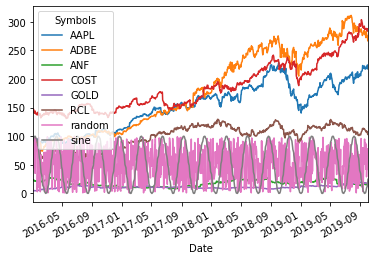

In [10]:
# Loading Test Data
# Setting Start and Enddate for Validation


start_test = datetime.datetime(2016, 1, 1)
end_test = datetime.datetime.now()

# Load Test Data

# Load several stocks
df_test = web.DataReader(['ADBE', 'AAPL', 'RCL', 'COST', 'ANF', 'GOLD'],'yahoo',
                               start=start_test, 
                               end=end_test)['Adj Close']

#Add random column for testing
df_test['random']=np.random.randint(1,100,df_test.shape[0])
df_test['sine']=50+50*np.sin(np.linspace(1,100,df_test.shape[0]))

# define second data input
df2_test = web.DataReader('GOLD','yahoo',
                               start=start_test, end=end_test)

# Convert df2_test to list
df2_test_list = list(df2_test['Adj Close'])


plt.figure();
df_test.plot();


In [42]:
#Load Model
model_name = 'model_w15v2_20'

# Init Model
window_size = 15

# Initialize Agent
if df2_test_list is not None:
    agent = Agent(window_size*2, pretrained=True, model_name=model_name)
else:
    agent = Agent(window_size, pretrained=True, model_name=model_name)

sum = 0
# Loop over stocks
for column in df_test:
    print(column)
    #rename feature column name
    df_test_list = list(df_test[column])
    dft = df_test.rename(columns={column: 'actual'})
    initial_offset = df_test_list[1] - df_test_list[0]
    val_result, history = evaluate_model(agent, df_test_list, df2_test_list, window_size, debug)
    show_eval_result(model_name, val_result, initial_offset)
    chart = visualize(dft, history)
    sum = sum+val_result
    print("Earnings of Model: ", val_result)
    #chart.display()

print("Sum: ", sum)

AAPL


I1003 21:18:31.045761  8916 evaluate.py:111] model_w15v2_20: +$69.90

2019-10-03 21:18:31 PC-Stefan root[18304] INFO model_w15v2_20: +$69.90



Earnings of Model:  69.90313720703125
ADBE


I1003 21:18:31.444209  8916 evaluate.py:111] model_w15v2_20: +$456.10

2019-10-03 21:18:31 PC-Stefan root[18304] INFO model_w15v2_20: +$456.10



Earnings of Model:  456.0997619628906
ANF


I1003 21:18:31.804538  8916 evaluate.py:111] model_w15v2_20: -$8.19

2019-10-03 21:18:31 PC-Stefan root[18304] INFO model_w15v2_20: -$8.19



Earnings of Model:  -8.194528579711914
COST


I1003 21:18:32.174114  8916 evaluate.py:111] model_w15v2_20: +$146.71

2019-10-03 21:18:32 PC-Stefan root[18304] INFO model_w15v2_20: +$146.71



Earnings of Model:  146.71243286132812
GOLD


I1003 21:18:32.544133  8916 evaluate.py:111] model_w15v2_20: +$3.24

2019-10-03 21:18:32 PC-Stefan root[18304] INFO model_w15v2_20: +$3.24



Earnings of Model:  3.2357311248779297
RCL


I1003 21:18:32.904293  8916 evaluate.py:111] model_w15v2_20: +$41.00

2019-10-03 21:18:32 PC-Stefan root[18304] INFO model_w15v2_20: +$41.00



Earnings of Model:  41.00489044189453
random


I1003 21:18:33.284173  8916 evaluate.py:111] model_w15v2_20: +$8803.00

2019-10-03 21:18:33 PC-Stefan root[18304] INFO model_w15v2_20: +$8803.00



Earnings of Model:  8803
sine


I1003 21:18:33.646837  8916 evaluate.py:111] model_w15v2_20: -$3356.45

2019-10-03 21:18:33 PC-Stefan root[18304] INFO model_w15v2_20: -$3356.45



Earnings of Model:  -3356.4486842431206
Sum:  6155.31274077519
